Apply Lambda: 13.74 seconds
Map Lambda: 0.54 seconds
Custom Vectorized Function: 0.18 seconds
Vectorized Addition: 0.00 seconds
Vectorized Sqrt: 0.00 seconds


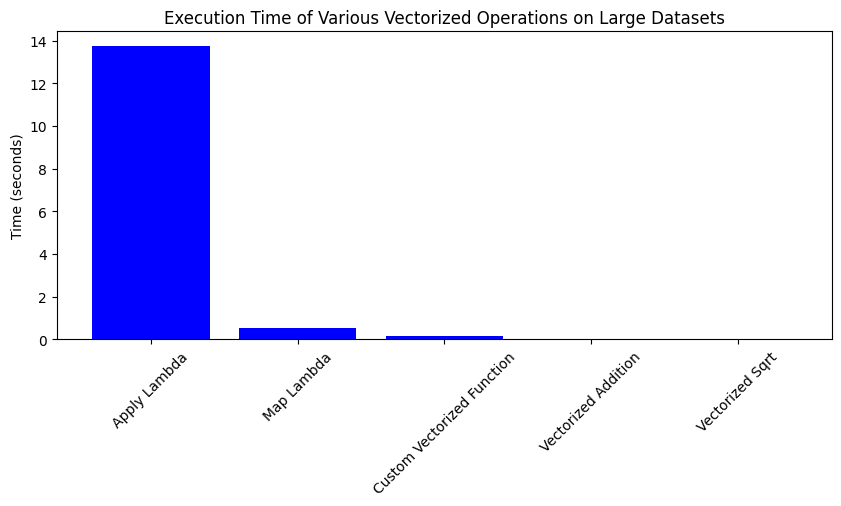

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Callable

# Step 1: Create a large datasets
num_rows = 1_000_000
df = pd.DataFrame({
    'A': np.random.rand(num_rows) * 100,
    'B': np.random.rand(num_rows) * 100
})

# Step 2: Define individual functions for each operations
def vectorized_addition():
    return df['A'] + df['B']

def vectorized_sqrt():
    return np.sqrt(df['A'])

def apply_lambda():
    return df.apply(lambda row: row['A'] * row['B'], axis=1)

def map_lambda():
    return df['A'].map(lambda x: x * 10)

def map_lambda():
    return df.map(lambda x: x * 2)

def custom_vectorized_function():
    def custom_func(x):
        return x * 2
    vectorized_func = np.vectorize(custom_func)
    return vectorized_func(df['A'])

# Step 3: Timing function using Callable from typing
def time_operation(func: Callable[[], pd.Series], label: str) -> float:
    start_time = time.time()
    result = func()
    elapsed_time = time.time() - start_time
    print(f"{label}: {elapsed_time:.2f} seconds")
    return elapsed_time

# Step 4: Apply and time each function using looping list
operations = [
    (apply_lambda, 'Apply Lambda'),
    (map_lambda, 'Map Lambda'),
    (custom_vectorized_function, 'Custom Vectorized Function'),
    (vectorized_addition, 'Vectorized Addition'),
    (vectorized_sqrt, 'Vectorized Sqrt'),
]

# Collect timings
times = [time_operation(func, label) for func, label in operations]

# Step 5: Plot the results
labels = [label for _, label in operations]

plt.figure(figsize=(10, 4))
plt.bar(labels, times, color='blue')
plt.ylabel('Time (seconds)')
plt.title('Execution Time of Various Vectorized Operations on Large Datasets')
plt.xticks(rotation=45)
plt.show()
